# Pre-processing MotionSense Dataset and Generate Views - Without Gravity - Filtered - Multiplying Acc by 9.81 m/s² - Resampling to 20 Hz

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pathlib import Path
from typing import List
import hashlib
import pandas as pd

from librep.datasets.har.motionsense import (
    RawMotionSense,
    RawMotionSenseIterator,
    MotionSenseDatasetGenerator
)
from librep.utils.dataset import PandasDatasetsIO

%matplotlib inline

/home/patrick/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_dir = Path("../../data_2/views/MotionSense/A_DeviceMotion_data/A_DeviceMotion_data")
motionsense_dataset = RawMotionSense(dataset_dir, download=True)
motionsense_dataset

MotionSense Dataset at: '../../data_2/views/MotionSense/A_DeviceMotion_data/A_DeviceMotion_data'

In [4]:
act_names = [motionsense_dataset.activity_names[i] for i in motionsense_dataset.activities]
act_names

['dws', 'ups', 'sit', 'std', 'wlk', 'jog']

In [5]:
iterator = RawMotionSenseIterator(motionsense_dataset, users_to_select=None, activities_to_select=None)
iterator

MotionSense Iterator: users=24, activities=6

In [6]:
motionsense_v1 = MotionSenseDatasetGenerator(iterator, time_window=150, window_overlap=0, add_gravity=False, 
add_filter=False, resampler=False, change_acc_measure=False)

# motionsense_v1 = MotionSenseDatasetGenerator(iterator, time_window=150, window_overlap=0, add_gravity=False, 
#                                              add_filter=False)
motionsense_v1

Dataset generator: time_window=150, overlap=0

In [7]:
train, validation, test = motionsense_v1.create_datasets(
    train_size=0.7,
    validation_size=0.1,
    test_size=0.2,
    ensure_distinct_users_per_dataset=True,
    balance_samples=True,
    seed=0
)
print(hashlib.sha1(pd.util.hash_pandas_object(train).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(validation).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(test).values).hexdigest())

print(sorted(train['user'].unique()))

Generating full df over MotionSense View: 360it [00:17, 20.54it/s]


(9242, 1805)
0512b620647e1d62b56cdb34a2330acba29f53c0
e3194e06a68bd169d5451dbff7c42648ca2c4289
004c02910e8228058c1373f0491d184c26d61ebe
[2, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 20, 21, 22, 23, 24]


In [8]:
motionsense_v2 = MotionSenseDatasetGenerator(iterator, time_window=60, window_overlap=0, add_gravity=True, 
add_filter=True, resampler=True, fs=20, change_acc_measure=True)

motionsense_v2

Dataset generator: time_window=60, overlap=0

In [9]:
train_v2, validation_v2, test_v2 = motionsense_v2.create_datasets(
    train_size=0.7,
    validation_size=0.1,
    test_size=0.2,
    ensure_distinct_users_per_dataset=True,
    balance_samples=True,
    seed=0
)
print(hashlib.sha1(pd.util.hash_pandas_object(train_v2).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(validation_v2).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(test_v2).values).hexdigest())

print(sorted(train_v2['user'].unique()))

Generating full df over MotionSense View: 360it [00:14, 25.06it/s]


(9242, 725)
bad20a4b7ffc7d1f246e00baaf9af24f958ce2d8
51ac451d8a7d84ec970c19f36ba028f4f0c3fb7f
34ff2de21405078ac40f9d538ce6ad28ba8bf044
[2, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 20, 21, 22, 23, 24]


In [31]:
import numpy as np
np.all(train_v2['index']/20 == train['index']/50)

True

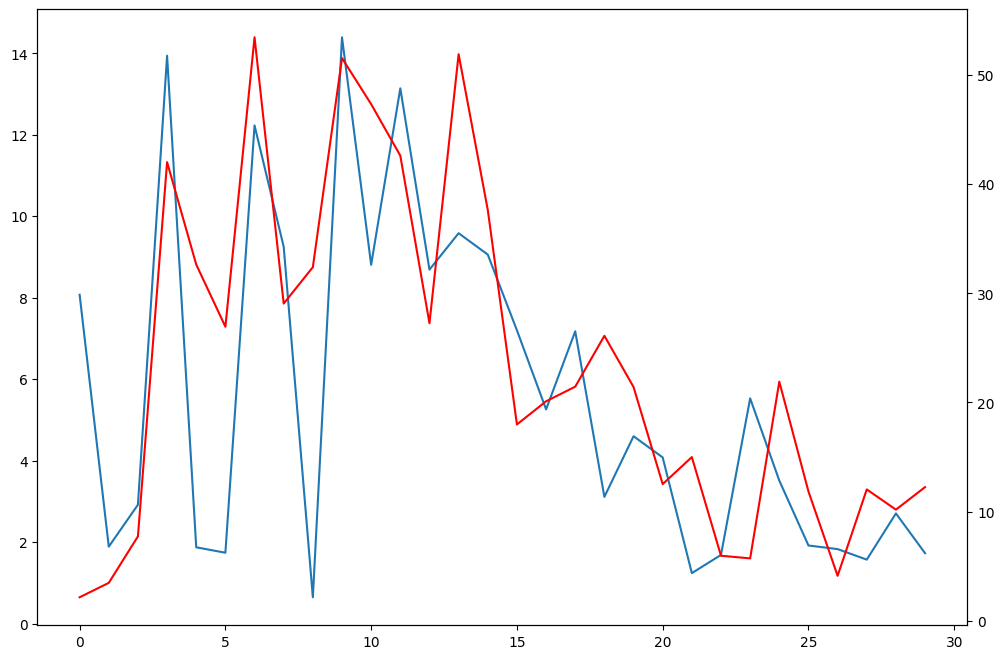

In [76]:
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack

ind = 10

cols = [f"userAcceleration.{axis}-{i}" for axis in ["x"] for i in range(150)]
sample_raw = train[cols].iloc[ind].values

data_raw = fftpack.fft(sample_raw)
data_raw = np.abs(data_raw)

cols = [f"userAcceleration.{axis}-{i}" for axis in ["x"] for i in range(60)]
sample_norm = train_v2[cols].iloc[ind].values

data_norm = fftpack.fft(sample_norm)
data_norm = np.abs(data_norm)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(30), data_raw[:30], label = 'Raw')
ax2 = ax.twinx()
ax2.plot(np.arange(30), data_norm[:30], label = 'Norm', color='red')

plt.show()

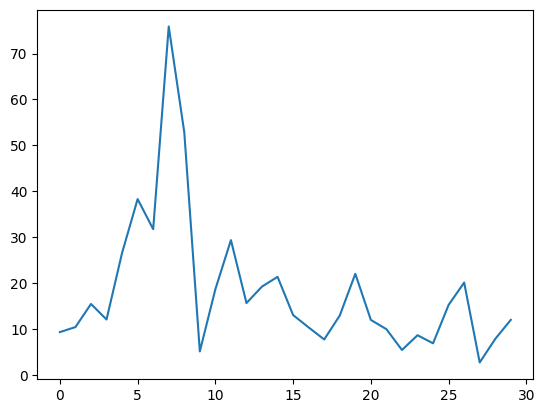

In [58]:
from sklearn 



In [10]:
print(hashlib.sha1(pd.util.hash_pandas_object(train).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(validation).values).hexdigest())
print(hashlib.sha1(pd.util.hash_pandas_object(test).values).hexdigest())

# 3d2e3d49233efdc3dfc138e55b2d44a51cf80c9d
# ece6166a183c151a9ac1a3111d300891f2fe1db8
# 9a7f20e984b305059b737e8f72cbd0e246345980

# 49bf80a87770414b49273263820f63f3c0e816c8
# e9f2ec9067ff9f85add9fbbc03fabff34a6b2deb
# 70168e3ac19682d6c21757dd9b25ca48dd956298

# seed = 42
# 52e16cbcf555433634ea7b255caa4769f94f53ad
# b8d9b33b2b0c1e5b45ef10d87cacf2515c742dd2
# 1db66b9ee2285a1a6232f79c9dc20b9422fd5230

0512b620647e1d62b56cdb34a2330acba29f53c0
e3194e06a68bd169d5451dbff7c42648ca2c4289
004c02910e8228058c1373f0491d184c26d61ebe


In [11]:
output_path = Path("../../data_2/views/MotionSense/balanced_view_20Hz_filtered_9.81_acc")

description = """# Balanced MotionSense

This view contains train, validation and test subsets in the following proportions:
- Train: 70% of samples
- Validation: 10% of samples
- Test: 20% of samples

After splits, the datasets were balanced in relation to the activity code column, that is, each subset have the same number of activitiy samples.

**NOTE**: Each subset contain samples from distinct users, that is, samples of one user belongs exclusivelly to one of three subsets.
"""
pandas_io = PandasDatasetsIO(output_path)
pandas_io

PandasDatasetIO at '../../data_2/views/MotionSense/balanced_view_20Hz_filtered_9.81_acc'

In [12]:
pandas_io.save(
    train=train, 
    validation=validation, 
    test=test, 
    description=description
)